In [133]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
data = pd.read_csv("avail_data.csv", parse_dates=['Ï∏°Ï†ïÏãúÍ∞Ñ'], encoding='cp949').sort_values('Ï∏°Ï†ïÏãúÍ∞Ñ').reset_index(drop=True)
data

Ï∏°Ï†ïÏãúÍ∞Ñ Ïò®Ïò§ÌîÑÎùºÏù∏Ïó¨Î∂Ä      ÏÉÅÌñ•ÌååÏõå2      ÏÉÅÌñ•SNR       ÌïòÌñ•ÌååÏõå      ÌïòÌñ•SNR  \
0     2024-04-01 00:20:00   onlie  48.666667  31.333333  -2.333333  38.666667   
1     2024-04-01 00:20:00   onlie  44.000000  25.000000   0.000000  37.500000   
2     2024-04-01 00:20:00   onlie  40.500000  31.000000   7.000000  42.500000   
3     2024-04-01 00:20:00   onlie  43.000000  30.400000  -0.200000  36.200000   
4     2024-04-01 00:20:00   onlie  43.000000  35.000000  -1.000000  40.000000   
...                   ...     ...        ...        ...        ...        ...   
95740 2024-05-01 23:00:00   onlie  32.000000  27.000000 -10.000000  39.500000   
95741 2024-05-01 23:00:00   onlie  35.000000  32.000000  13.000000  38.000000   
95742 2024-05-01 23:00:00   onlie  50.000000  31.000000  -3.000000  37.000000   
95743 2024-05-01 23:00:00   onlie  43.750000  20.500000   5.250000  42.500000   
95744 2024-05-01 23:00:00   onlie  39.000000  35.000000  11.000000  46.000000   

               ÏÖÄÎ≤àÌò∏  total_num  cum_num  cum_rate  
0         YSHS0079          1        1  1.000000  
1      YSHSHFC0008          1        1  1.000000  
2         YSWS0154          1        1  1.000000  
3        YSYW0063B          1        1  1.000000  
4         YSHS0035          1        0  0.000000  
...            ...        ...      ...       ...  
95740    YSJSC2004       2405     1380  0.573805  
95741     YSHS0013       1329      341  0.256584  
95742      YSSB2-7       1434      341  0.237796  
95743     YSWS0217       2177     1084  0.497933  
95744      YSWS1-1       2060      931  0.451942  

[95745 rows x 10 columns]

In [134]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ 2
outlier = pd.read_csv("Ïû•Ïï†ÎÇ¥Ïó≠_ÏàòÏ†ï.csv", encoding='cp949').drop_duplicates().reset_index(drop=True)

# Ïû•Ïï†ÎÇ¥Ïó≠ Îç∞Ïù¥ÌÑ∞Ïùò Ï∏°Ï†ïÏãúÍ∞ÑÏùÄ settopÍ≥º Îã§Î•¥Í≤å Îí§Ïóê +09:00Í∞Ä Î∂ôÏñ¥ÏûàÏùå -> ÏÇ≠Ï†ú
outlier['Ï∏°Ï†ïÏãúÍ∞Ñ'] = outlier['Ï∏°Ï†ïÏãúÍ∞Ñ'].str.replace("+09:00", "")

# Ï∏°Ï†ïÏãúÍ∞Ñ Ïó¥ ÎÇ†ÏßúÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω
outlier['Ï∏°Ï†ïÏãúÍ∞Ñ'] = pd.to_datetime(outlier['Ï∏°Ï†ïÏãúÍ∞Ñ'])
outlier = outlier.drop(columns = ['index'])
outlier

ÏÖÄÎ≤àÌò∏                Ï∏°Ï†ïÏãúÍ∞Ñ      Ïû•Ïï†Ïó¨Î∂Ä
0      YSWS4-5 2024-04-01 10:34:43     MAJOR
1      YSSB1-6 2024-04-01 11:13:33     MAJOR
2     YSWS0244 2024-04-01 15:22:45  CRITICAL
3    YSWSG3-4B 2024-04-02 10:54:25     MAJOR
4     YSJB5-25 2024-04-02 13:41:30     MAJOR
..         ...                 ...       ...
181   YSYW0030 2024-04-30 09:33:27     MAJOR
182   YSYW0030 2024-04-30 10:01:47  CRITICAL
183    YSWS8-5 2024-04-30 14:31:26     MAJOR
184   YSYW0009 2024-04-30 14:44:35     MAJOR
185   YSSB1-11 2024-04-30 16:54:56     MAJOR

[186 rows x 3 columns]

In [135]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Ïû•Ïï†ÎÇ¥Ïó≠ Îç∞Ïù¥ÌÑ∞Îäî ÏãúÍ∞ÑÎã®ÏúÑÍ∞Ä Ï¥à Îã®ÏúÑÎ°ú Ï∏°Ï†ïÏù¥ ÎêòÏóàÏßÄÎßå settop Îç∞Ïù¥ÌÑ∞Îäî 5Î∂ÑÎã®ÏúÑÏûÑ Îî∞ÎùºÏÑú settopÎç∞Ïù¥ÌÑ∞ÏóêÏÑú Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÏïûÏ™Ω ÏãúÍ∞ÑÏùÑ Ï∞æÏïÑ Ïû•Ïï† Î∞úÏÉùÏßÄÏ†êÏúºÎ°ú ÏÑ†Ï†ï

def find_nearest_time(df, target_time, cell_number):

    # Ìï¥Îãπ ÏÖÄÎ≤àÌò∏Í∞Ä dfÏïàÏóê Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞
    if cell_number in df['ÏÖÄÎ≤àÌò∏'].unique():

        # Ïû•Ïï†Î∞úÏÉù ÏãúÍ∞ÑÎ≥¥Îã§ ÎÇòÏ§ë ÏãúÍ∞ÑÏù∏ Îç∞Ïù¥ÌÑ∞ Ï†úÏô∏
        temp_df = df[df['Ï∏°Ï†ïÏãúÍ∞Ñ'] <= target_time]

        # Í∑∏ Ï§ë ÏÖÄÎ≤àÌò∏Í∞Ä ÎèôÏùºÌïú Í≤ΩÏö∞Îßå ÎÇ®ÍπÄ
        temp_df = temp_df[temp_df['ÏÖÄÎ≤àÌò∏'] == cell_number]
        
        # Ï°∞Í±¥Ïóê ÎßûÎäî ÌñâÏù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞ Ï¶â ÌñâÏùò Í∞úÏàòÍ∞Ä 0Ïù¥ ÏïÑÎãå Í≤ΩÏö∞
        if len(temp_df) != 0:
            # Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÏãúÍ∞ÑÏùÑ Í∞ÄÏ†∏ÏôÄÏïºÌï® Ïù¥ Îïå dfÎäî Ï∏°Ï†ïÏãúÍ∞Ñ Í∏∞Ï§Ä Ï†ïÎ†¨Ïù¥ ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú Í∞ÄÏû• ÎßàÏßÄÎßâ ÌñâÏùÑ Í∞ÄÏ†∏Ïò¥
            return temp_df.iloc[-1]

merged = []

# Ïû•Ïï† Î∞úÏÉù dfÏóê ÎåÄÌïòÏó¨ Î™®Îì† ÌñâÏóê ÏàòÌñâ
for _, row in outlier.iterrows():
    nearest_row = find_nearest_time(data, row['Ï∏°Ï†ïÏãúÍ∞Ñ'], row['ÏÖÄÎ≤àÌò∏'])

    if nearest_row is not None:

        # Ïû•Ïï†Ïó¨Î∂Ä Ïó¥ÏùÑ ÏÉùÏÑ±ÌïòÏó¨ 1 ÏßÄÏ†ï
        nearest_row['Ïû•Ïï†Ïó¨Î∂Ä'] = 1

        # Ï°∞Í±¥Ïóê Î∂ÄÌï©ÌïòÎäî Ìñâ mergedÏóê Ï†ÄÏû•
        merged.append(nearest_row)

# merged Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞ df Ìôî
merged_df = pd.DataFrame(merged)
merged_df = merged_df.drop_duplicates()
merged_df

Ï∏°Ï†ïÏãúÍ∞Ñ Ïò®Ïò§ÌîÑÎùºÏù∏Ïó¨Î∂Ä      ÏÉÅÌñ•ÌååÏõå2      ÏÉÅÌñ•SNR       ÌïòÌñ•ÌååÏõå      ÌïòÌñ•SNR  \
785   2024-04-01 09:00:00   onlie  42.000000  30.000000  -4.000000  39.000000   
1018  2024-04-01 10:10:00   onlie  33.000000  31.000000  -6.000000  35.000000   
4371  2024-04-02 10:50:00   onlie  35.000000  33.000000   6.000000  42.000000   
4335  2024-04-02 10:30:00   onlie  30.000000  34.000000 -13.000000  34.500000   
7631  2024-04-03 08:50:00   onlie  40.000000  30.000000   9.000000  42.000000   
...                   ...     ...        ...        ...        ...        ...   
91742 2024-04-30 09:00:00   onlie  54.000000  26.000000  16.000000  41.000000   
91843 2024-04-30 10:00:00   onlie  55.000000  30.000000   0.000000  39.000000   
85052 2024-04-27 21:45:00   onlie  48.000000  31.000000  -4.000000  39.000000   
92329 2024-04-30 14:35:00   onlie  42.888889  29.000000  -2.888889  36.666667   
92425 2024-04-30 15:25:00   onlie  42.000000  33.666667  -2.000000  35.000000   

             ÏÖÄÎ≤àÌò∏  total_num  cum_num  cum_rate  Ïû•Ïï†Ïó¨Î∂Ä  
785      YSWS4-5          4        0  0.000000     1  
1018     YSSB1-6          5        0  0.000000     1  
4371   YSWSG3-4B         40       29  0.725000     1  
4335    YSJB5-25         51       26  0.509804     1  
7631   YSJSC2003         88       14  0.159091     1  
...          ...        ...      ...       ...   ...  
91742   YSYW0030        795      260  0.327044     1  
91843   YSYW0030        798      260  0.325815     1  
85052    YSWS8-5         20        0  0.000000     1  
92329   YSYW0009       2310     1133  0.490476     1  
92425   YSSB1-11       1330      722  0.542857     1  

[132 rows x 11 columns]

In [136]:
# Ïû•Ïï†Î∞úÏÉùÏùÑ 1 , Ï†ïÏÉÅÏùÑ 0ÏúºÎ°ú ÏßÄÏ†ï
data['Ïû•Ïï†Ïó¨Î∂Ä'] = 0

# merged_dfÏóê Ï°¥Ïû¨ÌïòÎäî Îç∞Ïù¥ÌÑ∞Îäî Ïû•Ïï† Î∞úÏÉù Îç∞Ïù¥ÌÑ∞ Ïù¥ÎØÄÎ°ú Ïù¥ÏôÄ ÎèôÏùºÌïú Ïù∏Îç±Ïä§Î•º Í∞ÄÏßÑ dataÏóêÎäî Ïû•Ïï†Ïó¨Î∂ÄÎ•º 1Î°ú ÏÑ§Ï†ï
# merged_dfÎäî dataÏóêÏÑú Í∞ÄÏ†∏Ïò® ÌñâÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù∏Îç±Ïä§Í∞Ä ÎèôÏùºÌï®
data['Ïû•Ïï†Ïó¨Î∂Ä'].loc[merged_df.index] = 1

In [137]:
# Ï∏°Ï†ïÏãúÍ∞Ñ Ïó¥ÏùÑ Ïùº, Ïãú, Î∂Ñ, ÏöîÏùºÎ°ú ÎÇòÎàî Ïù¥ Îïå Ïó∞ÎèÑÎäî Ï∞®Ïù¥Í∞Ä ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ïª¨ÎüºÏóê Îî∞Î°ú ÎÑ£ÏßÄ ÏïäÏùå
# 5Ïõî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏßÄÎßå, 5Ïõî 1ÏùºÎßå Ï°¥Ïû¨ÌïòÏó¨ month Ï∂îÍ∞Ä ÌïòÏßÄ ÏïäÏùå

data['Ïùº'] = data['Ï∏°Ï†ïÏãúÍ∞Ñ'].dt.day
data['Ïãú'] = data['Ï∏°Ï†ïÏãúÍ∞Ñ'].dt.hour
data['Î∂Ñ'] = data['Ï∏°Ï†ïÏãúÍ∞Ñ'].dt.minute
data['ÏöîÏùº'] = data['Ï∏°Ï†ïÏãúÍ∞Ñ'].dt.weekday
data = data.drop(columns=['Ï∏°Ï†ïÏãúÍ∞Ñ'])
data

Ïò®Ïò§ÌîÑÎùºÏù∏Ïó¨Î∂Ä      ÏÉÅÌñ•ÌååÏõå2      ÏÉÅÌñ•SNR       ÌïòÌñ•ÌååÏõå      ÌïòÌñ•SNR          ÏÖÄÎ≤àÌò∏  \
0       onlie  48.666667  31.333333  -2.333333  38.666667     YSHS0079   
1       onlie  44.000000  25.000000   0.000000  37.500000  YSHSHFC0008   
2       onlie  40.500000  31.000000   7.000000  42.500000     YSWS0154   
3       onlie  43.000000  30.400000  -0.200000  36.200000    YSYW0063B   
4       onlie  43.000000  35.000000  -1.000000  40.000000     YSHS0035   
...       ...        ...        ...        ...        ...          ...   
95740   onlie  32.000000  27.000000 -10.000000  39.500000    YSJSC2004   
95741   onlie  35.000000  32.000000  13.000000  38.000000     YSHS0013   
95742   onlie  50.000000  31.000000  -3.000000  37.000000      YSSB2-7   
95743   onlie  43.750000  20.500000   5.250000  42.500000     YSWS0217   
95744   onlie  39.000000  35.000000  11.000000  46.000000      YSWS1-1   

       total_num  cum_num  cum_rate  Ïû•Ïï†Ïó¨Î∂Ä  Ïùº   Ïãú   Î∂Ñ  ÏöîÏùº  
0              1        1  1.000000     0  1   0  20   0  
1              1        1  1.000000     0  1   0  20   0  
2              1        1  1.000000     0  1   0  20   0  
3              1        1  1.000000     0  1   0  20   0  
4              1        0  0.000000     0  1   0  20   0  
...          ...      ...       ...   ... ..  ..  ..  ..  
95740       2405     1380  0.573805     0  1  23   0   2  
95741       1329      341  0.256584     0  1  23   0   2  
95742       1434      341  0.237796     0  1  23   0   2  
95743       2177     1084  0.497933     0  1  23   0   2  
95744       2060      931  0.451942     0  1  23   0   2  

[95745 rows x 14 columns]

### Ïò®Ïò§ÌîÑÎùºÏù∏Ïó¨Î∂Ä, ÏÖÄÎ≤àÌò∏ ÎØ∏ÏÉÅÏö©ÏúºÎ°ú Ïù∏Ìïú Ï£ºÏÑùÏ≤òÎ¶¨ ###
ÎØ∏ÏÇ¨Ïö© Ïù¥Ïú†

1. Ïò®Ïò§ÌîÑÎùºÏù∏
<br>Í∏∞Ï°¥ Ïò®Ïò§ÌîÑÎùºÏù∏ ÏÇ¨Ïö©Ïó¨Î∂Ä Ïó¥Ïùò Ïó¨Îü¨ Í∞íÎì§(w-online Îì±Îì±)ÏùÑ Î™®Îëê onlineÏúºÎ°ú Î¥êÎèÑ Î¨¥Î∞©ÌïòÎã§Îäî Í∞ÄÏù¥ÎìúÎùºÏù∏Ïù¥ Ï°¥Ïû¨ÌñàÏùå
<br>Ï†ÑÏ≤òÎ¶¨ Ïãú on/off Ïù¥Î∂ÑÌôîÎ•º ÏßÑÌñâÌï®
<br>ÌïòÏßÄÎßå Î™ÖÏπ≠Ïù¥ Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê 100% ÏùºÏπòÌïòÏßÄÎäî ÏïäÎäî Í∞íÏûÑ
<br>ÌîºÏ≥ê Ìè¨Ìï®, ÎØ∏Ìè¨Ìï® Î∂ÑÏÑùÏùÑ Ìï¥Î≥¥ÏïòÎäîÎç∞ Í≤∞Í≥ºÎäî ÎπÑÏä∑ÌïòÍ≤å ÎÇòÏôÄ Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏ÌïòÍ∏∞Î°ú Í≤∞Ï†ï

2. ÏÖÄÎ≤àÌò∏
<br>Ïû•Ïï†Í∞Ä ÏûàÎäî ÏÖãÌÉëÎ∞ïÏä§Ïùò Îç∞Ïù¥ÌÑ∞Îßå ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµ
<br>ÌïòÏßÄÎßå Ïã§Ï†ú Ïû•Ïï† ÏòàÏ∏°ÏùÄ Ï†ÑÏ≤¥ ÏÖãÌÉëÎ∞ïÏä§Ïóê ÎåÄÌï¥ Ïù¥Î£®Ïñ¥Ï†∏Ïïº Ìï® Ï¶â, Î™®Îç∏Ïù¥ Ïû•Ïï†Í∞Ä ÏûàÎäî ÏÖãÌÉëÎ∞ïÏä§ÎøêÎßå ÏïÑÎãàÎùº Ïû•Ïï†Í∞Ä ÏóÜÎäî ÏÖãÌÉëÎ∞ïÏä§ÎèÑ ÏòàÏ∏°Ìï† Ïàò ÏûàÏñ¥Ïïº Ìï®
<br>ÏÖÄÎ≤àÌò∏Î•º Î™®Îç∏ ÌïôÏäµÏóê Ìè¨Ìï®ÏãúÌÇ§Î©¥ Ïò§Î•òÍ∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏùå
<br>ÎòêÌïú ÏÖÄÎ≤àÌò∏Îäî Í∞Å ÏÖãÌÉëÎ∞ïÏä§Î•º Íµ¨Î∂ÑÌïòÎäî Í≥†Ïú† ÏãùÎ≥ÑÏûêÏù¥ÎØÄÎ°ú, ÌäπÏ†ï ÏÖãÌÉëÎ∞ïÏä§Ïóê ÎåÄÌïú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä Î™®Îç∏Ïóê Í≥ºÎèÑÌïòÍ≤å ÎßûÏ∂∞ÏßÄÎäî(Í≥ºÏ†ÅÌï©) ÌòÑÏÉÅÏùÑ ÏùºÏúºÌÇ¨ Ïàò ÏûàÏùå
<br>ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÌîºÏ≥ê Ìè¨Ìï®, ÎØ∏Ìè¨Ìï® Î∂ÑÏÑùÏùÑ Ìï¥Î≥¥ÏïòÎäîÎç∞ Í≤∞Í≥ºÎäî ÎπÑÏä∑ÌïòÍ≤å ÎÇòÏôÄ Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏ÌïòÍ∏∞Î°ú Í≤∞Ï†ï

In [138]:
# from sklearn.preprocessing import LabelEncoder
# # labelencoderÎ•º ÌÜµÌï¥ Î¨∏ÏûêÌòï Î≥ÄÏàò Ïò®Ïò§ÌîÑÎùºÏù∏Ïó¨Î∂Ä intÎ°ú ÏπòÌôò

# le1 = LabelEncoder()
# le2 = LabelEncoder()

# data['Ïò®Ïò§ÌîÑÎùºÏù∏Ïó¨Î∂Ä'] = le1.fit_transform(data['Ïò®Ïò§ÌîÑÎùºÏù∏Ïó¨Î∂Ä'])
# data['ÏÖÄÎ≤àÌò∏'] = le2.fit_transform(data['ÏÖÄÎ≤àÌò∏'])

# cum_rateÎßå ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê total_numÍ≥º cum_num ÏÇ≠Ï†ú
data = data.drop(columns=['total_num'])
data = data.drop(columns=['cum_num'])
data = data.drop(columns=['Ïò®Ïò§ÌîÑÎùºÏù∏Ïó¨Î∂Ä'])

data

ÏÉÅÌñ•ÌååÏõå2      ÏÉÅÌñ•SNR       ÌïòÌñ•ÌååÏõå      ÌïòÌñ•SNR          ÏÖÄÎ≤àÌò∏  cum_rate  \
0      48.666667  31.333333  -2.333333  38.666667     YSHS0079  1.000000   
1      44.000000  25.000000   0.000000  37.500000  YSHSHFC0008  1.000000   
2      40.500000  31.000000   7.000000  42.500000     YSWS0154  1.000000   
3      43.000000  30.400000  -0.200000  36.200000    YSYW0063B  1.000000   
4      43.000000  35.000000  -1.000000  40.000000     YSHS0035  0.000000   
...          ...        ...        ...        ...          ...       ...   
95740  32.000000  27.000000 -10.000000  39.500000    YSJSC2004  0.573805   
95741  35.000000  32.000000  13.000000  38.000000     YSHS0013  0.256584   
95742  50.000000  31.000000  -3.000000  37.000000      YSSB2-7  0.237796   
95743  43.750000  20.500000   5.250000  42.500000     YSWS0217  0.497933   
95744  39.000000  35.000000  11.000000  46.000000      YSWS1-1  0.451942   

       Ïû•Ïï†Ïó¨Î∂Ä  Ïùº   Ïãú   Î∂Ñ  ÏöîÏùº  
0         0  1   0  20   0  
1         0  1   0  20   0  
2         0  1   0  20   0  
3         0  1   0  20   0  
4         0  1   0  20   0  
...     ... ..  ..  ..  ..  
95740     0  1  23   0   2  
95741     0  1  23   0   2  
95742     0  1  23   0   2  
95743     0  1  23   0   2  
95744     0  1  23   0   2  

[95745 rows x 11 columns]

In [139]:
# ÌäπÏ†ï ÏãúÍ∞ÑÍ∏∞Ï§Ä Ïù¥Ï†Ñ ÏãúÏ†êÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÎπÑÍµêÌïòÎäî lag Ï∂îÍ∞Ä
# tÏãúÏ†ê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú lagÍ∞Ä 1Ïù∏ Í≤ΩÏö∞ t-1 ÏãúÏ†êÏùò Îç∞Ïù¥ÌÑ∞
def add_lag_features(df, group_col, target_cols, lag_num):
    temp_df = df.copy()

    # ÏõêÌïòÎäî Ïó¥Ïóê ÎåÄÌï¥ Î™®Îëê ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ Î∞òÎ≥µÎ¨∏ Ï∂îÍ∞Ä
    for col in target_cols:
        # ÏõêÌïòÎäî lagÏùò Ïàò ÎßåÌÅº ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ Î∞òÎ≥µÎ¨∏ Ï∂îÍ∞Ä
        for lag in range(1, lag_num + 1):
            # ÏõêÌïòÎäî Ïó¥Ïùò Í∏∞Ï§ÄÍ∞íÏóêÏÑú lagÎßåÌÅº Ïù¥ÎèôÌïú lag ÌîºÏ≥ê ÏÉùÏÑ±ÌïòÍ≥† dfÏóê Ï∂îÍ∞Ä
            temp_df[f'{col}_lag{lag}'] = temp_df.groupby(group_col)[col].shift(lag)
    return temp_df

target_cols = ['ÏÉÅÌñ•ÌååÏõå2', 'ÏÉÅÌñ•SNR', 'ÌïòÌñ•ÌååÏõå', 'ÌïòÌñ•SNR']

lag_num=5

data_with_lags = add_lag_features(data, 'ÏÖÄÎ≤àÌò∏', target_cols, lag_num)

data_with_lags = data_with_lags.dropna().reset_index(drop=True)
data_with_lags

ÏÉÅÌñ•ÌååÏõå2      ÏÉÅÌñ•SNR       ÌïòÌñ•ÌååÏõå      ÌïòÌñ•SNR          ÏÖÄÎ≤àÌò∏  cum_rate  \
0      43.500000  30.500000   5.500000  42.000000     YSWS0217  0.500000   
1      43.000000  35.000000   2.000000  32.000000    YSJBG6-1F  0.666667   
2      53.000000  39.000000  -6.000000  32.000000    YSJSC4007  0.333333   
3      41.454545  28.818182  -0.272727  37.181818  YSDGHFC0054  1.000000   
4      46.000000  29.333333  -8.000000  33.666667     YSHS0065  1.000000   
...          ...        ...        ...        ...          ...       ...   
95248  32.000000  27.000000 -10.000000  39.500000    YSJSC2004  0.573805   
95249  35.000000  32.000000  13.000000  38.000000     YSHS0013  0.256584   
95250  50.000000  31.000000  -3.000000  37.000000      YSSB2-7  0.237796   
95251  43.750000  20.500000   5.250000  42.500000     YSWS0217  0.497933   
95252  39.000000  35.000000  11.000000  46.000000      YSWS1-1  0.451942   

       Ïû•Ïï†Ïó¨Î∂Ä  Ïùº   Ïãú   Î∂Ñ  ...  ÌïòÌñ•ÌååÏõå_lag1  ÌïòÌñ•ÌååÏõå_lag2  ÌïòÌñ•ÌååÏõå_lag3  ÌïòÌñ•ÌååÏõå_lag4  \
0         0  1   1  30  ...  10.000000  10.000000  13.000000  -3.000000   
1         0  1   1  30  ...   2.333333   1.000000   2.333333  -2.000000   
2         0  1   1  30  ...  -6.000000   3.000000   2.000000  -3.000000   
3         0  1   1  30  ...  -1.400000  -1.846154  -2.466667  -2.000000   
4         0  1   1  30  ...   2.000000  -4.333333  -1.000000   0.666667   
...     ... ..  ..  ..  ...        ...        ...        ...        ...   
95248     0  1  23   0  ...  -3.000000   1.000000   6.000000   6.000000   
95249     0  1  23   0  ...   9.500000  13.000000  12.000000  12.000000   
95250     0  1  23   0  ...  -1.000000  -2.000000  -1.000000   0.000000   
95251     0  1  23   0  ...   8.000000   7.000000   2.000000   1.000000   
95252     0  1  23   0  ...  -5.000000  -5.000000   7.000000  -0.500000   

       ÌïòÌñ•ÌååÏõå_lag5  ÌïòÌñ•SNR_lag1  ÌïòÌñ•SNR_lag2  ÌïòÌñ•SNR_lag3  ÌïòÌñ•SNR_lag4  ÌïòÌñ•SNR_lag5  
0       0.666667   41.000000   41.000000   45.000000   41.000000   42.333333  
1      -1.250000   35.333333   39.000000   34.333333   34.000000   36.000000  
2      -3.000000   31.000000   38.000000   38.000000   35.500000   35.500000  
3      -1.727273   36.866667   36.615385   36.200000   36.700000   36.636364  
4       1.200000   34.500000   34.000000   34.833333   35.333333   34.800000  
...          ...         ...         ...         ...         ...         ...  
95248   1.000000   38.000000   39.909091   41.000000   40.000000   41.000000  
95249  12.000000   37.000000   38.000000   38.000000   38.000000   38.000000  
95250 -12.000000   35.000000   34.000000   35.000000   35.000000   36.000000  
95251   6.000000   43.000000   43.000000   43.000000   42.000000   43.000000  
95252   1.000000   41.000000   42.000000   44.000000   43.500000   43.000000  

[95253 rows x 31 columns]

In [140]:
# ÏÖÄÎ≤àÌò∏Îäî Î™®Îç∏ ÌïôÏäµÏóê ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê ÏÇ≠Ï†úÌï¥Ï§å
data_with_lags = data_with_lags.drop(columns=['ÏÖÄÎ≤àÌò∏'])

In [141]:
data_with_lags

ÏÉÅÌñ•ÌååÏõå2      ÏÉÅÌñ•SNR       ÌïòÌñ•ÌååÏõå      ÌïòÌñ•SNR  cum_rate  Ïû•Ïï†Ïó¨Î∂Ä  Ïùº   Ïãú   Î∂Ñ  \
0      43.500000  30.500000   5.500000  42.000000  0.500000     0  1   1  30   
1      43.000000  35.000000   2.000000  32.000000  0.666667     0  1   1  30   
2      53.000000  39.000000  -6.000000  32.000000  0.333333     0  1   1  30   
3      41.454545  28.818182  -0.272727  37.181818  1.000000     0  1   1  30   
4      46.000000  29.333333  -8.000000  33.666667  1.000000     0  1   1  30   
...          ...        ...        ...        ...       ...   ... ..  ..  ..   
95248  32.000000  27.000000 -10.000000  39.500000  0.573805     0  1  23   0   
95249  35.000000  32.000000  13.000000  38.000000  0.256584     0  1  23   0   
95250  50.000000  31.000000  -3.000000  37.000000  0.237796     0  1  23   0   
95251  43.750000  20.500000   5.250000  42.500000  0.497933     0  1  23   0   
95252  39.000000  35.000000  11.000000  46.000000  0.451942     0  1  23   0   

       ÏöîÏùº  ...  ÌïòÌñ•ÌååÏõå_lag1  ÌïòÌñ•ÌååÏõå_lag2  ÌïòÌñ•ÌååÏõå_lag3  ÌïòÌñ•ÌååÏõå_lag4  ÌïòÌñ•ÌååÏõå_lag5  \
0       0  ...  10.000000  10.000000  13.000000  -3.000000   0.666667   
1       0  ...   2.333333   1.000000   2.333333  -2.000000  -1.250000   
2       0  ...  -6.000000   3.000000   2.000000  -3.000000  -3.000000   
3       0  ...  -1.400000  -1.846154  -2.466667  -2.000000  -1.727273   
4       0  ...   2.000000  -4.333333  -1.000000   0.666667   1.200000   
...    ..  ...        ...        ...        ...        ...        ...   
95248   2  ...  -3.000000   1.000000   6.000000   6.000000   1.000000   
95249   2  ...   9.500000  13.000000  12.000000  12.000000  12.000000   
95250   2  ...  -1.000000  -2.000000  -1.000000   0.000000 -12.000000   
95251   2  ...   8.000000   7.000000   2.000000   1.000000   6.000000   
95252   2  ...  -5.000000  -5.000000   7.000000  -0.500000   1.000000   

       ÌïòÌñ•SNR_lag1  ÌïòÌñ•SNR_lag2  ÌïòÌñ•SNR_lag3  ÌïòÌñ•SNR_lag4  ÌïòÌñ•SNR_lag5  
0       41.000000   41.000000   45.000000   41.000000   42.333333  
1       35.333333   39.000000   34.333333   34.000000   36.000000  
2       31.000000   38.000000   38.000000   35.500000   35.500000  
3       36.866667   36.615385   36.200000   36.700000   36.636364  
4       34.500000   34.000000   34.833333   35.333333   34.800000  
...           ...         ...         ...         ...         ...  
95248   38.000000   39.909091   41.000000   40.000000   41.000000  
95249   37.000000   38.000000   38.000000   38.000000   38.000000  
95250   35.000000   34.000000   35.000000   35.000000   36.000000  
95251   43.000000   43.000000   43.000000   42.000000   43.000000  
95252   41.000000   42.000000   44.000000   43.500000   43.000000  

[95253 rows x 30 columns]

### Î™®Îç∏ Î¶¨Ïä§Ìä∏ ###
1. XGBoost
2. LogisticRegression
3. SupportVectorMachine
4. RandomForest
5. Catboost

- Î≥¥ÌÜµÏùò Í≤ΩÏö∞ f1 scoreÎ•º ÌÜµÌï¥ Î™®Îç∏ ÌèâÍ∞ÄÎ•º ÏßÑÌñâ Ìï®
    - ÌïòÏßÄÎßå Îç∞Ïù¥ÌÑ∞Í∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ï≥ê ÏûàÎäî Í≤ΩÏö∞ f1 scoreÎäî Ï¢ãÏùÄ Î∞©Î≤ïÏù¥ ÏïÑÎãò
    - ex 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ Ï§ë ÎπÑÏ†ïÏÉÅÏù¥ 5Í∞úÍ∞Ä Ï°¥Ïû¨Ìï® Ïù¥ Îïå ÌïôÏäµÎêú Î™®Îç∏Ïù¥ Î™®Îëê Ï†ïÏÉÅÏù¥ÎùºÍ≥† ÏòàÏ∏°ÌïòÎ©¥ Ï†ïÌôïÎèÑÎäî 95%Í∞Ä ÎêòÍ≥† f1 scoreÎäî Ï¢ãÍ≤å ÎÇòÏò¥

- Îî∞ÎùºÏÑú settop Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ Ïû•Ïï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÌòÑÏ†ÄÌûà Ï†ÅÍ∏∞ ÎïåÎ¨∏Ïóê ROC Í≥°ÏÑ†ÏùÑ ÌÜµÌï¥ ÌèâÍ∞Ä ÏßÑÌñâ
    - ROC Í≥°ÏÑ†ÏùÄ Ï†ïÏÉÅ ÎπÑÏ†ïÏÉÅÏùÑ Íµ¨Î∂ÑÌïòÎäî ÏûÑÍ≥ÑÍ∞íÏùÑ Î≥ÄÌôîÏãúÌÇ§Î©¥ÏÑú ÏñªÏùÑ Ïàò ÏûàÎäî precisionÍ≥º recallÍ∞íÏùò Î≥ÄÌôîÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú Î≥¥Ïó¨ Ï§å
    - ÎòêÌïú AUC(Area Under Curve)Î•º ÌÜµÌï¥ Ïù¥Î•º ÌïòÎÇòÏùò Ïà´ÏûêÎ°ú ÏöîÏïÖÌïòÏó¨ ÎπÑÍµê Í∞ÄÎä•


üìå Î™®Îç∏Îßå Î≥ÄÍ≤ΩÌïòÍ≥† ÎèôÏùºÌïú ÏΩîÎìúÎ•º ÏÇ¨Ïö©ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Ï≤´ Î≤àÏß∏Î•º Ï†úÏô∏Ìïú ÏΩîÎìú Ï£ºÏÑù ÏÉùÎûµ

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 199/199 [00:01<00:00, 142.36it/s]


Best Threshold: 0.064
Best F1 Score: 0.1081
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19025
           1       0.18      0.08      0.11        26

    accuracy                           1.00     19051
   macro avg       0.59      0.54      0.55     19051
weighted avg       1.00      1.00      1.00     19051



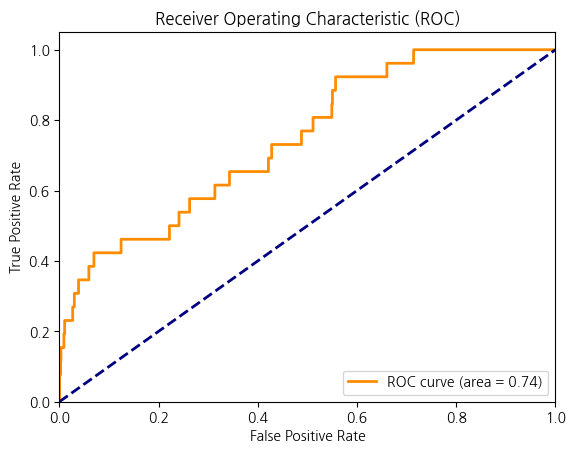

[[19016     9]
 [   24     2]]


In [142]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from tqdm.auto import tqdm

# Ïû•Ïï†Ïó¨Î∂ÄÎ•º Ï†úÏô∏Ìïú Î™®Îì† Ïó¥ÏùÑ X, Ïû•Ïï†Ïó¨Î∂ÄÎ•º yÎ°ú ÏßÄÏ†ï
X = data_with_lags.drop(columns=['Ïû•Ïï†Ïó¨Î∂Ä'])
y = data_with_lags['Ïû•Ïï†Ïó¨Î∂Ä']

# train 0.8, test 0.2Î°ú Íµ¨Î∂Ñ
# Ïû•Ïï† Î∞úÏÉù Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅ Îç∞Ïù¥ÌÑ∞Î≥¥Îã§ Ìõ®Ïî¨ Ï†ÅÍ∏∞ ÎïåÎ¨∏Ïóê stratifyÎ•º ÏÑ§Ï†ïÌïòÏó¨ ÌïôÏäµÎç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Ïû•Ïï† Î∞úÏÉù Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®ÏùÑ ÎßûÏ∂∞Ï§å
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


model = XGBClassifier(learning_rate=0.1, n_estimators=1000)

# early stoppingÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

# Î™®Îç∏ÏùÑ Ï†ÄÏû•
model.save_model("xgb_model.json")

# ÏµúÏ†ÅÏùò ÏûÑÍ≥ÑÍ∞íÍ≥º f1 scoreÎ•º Ï∞æÍ∏∞
best_threshold = 0
best_f1_score = 0

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
y_proba = model.predict_proba(X_test)[:, 1]

# 0.2 ~ 0.001ÍπåÏßÄ Î∞òÎ≥µÎ¨∏ÏùÑ ÌÜµÌï¥ f1 scoreÎ•º Í≥ÑÏÇ∞
for threshold in tqdm(np.arange(0.2, 0.001, -0.001)):
    
    # ÏòàÏ∏° ÌôïÎ•†Ïù¥ ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞ True, ÏûëÏùÄ Í≤ΩÏö∞ False
    y_pred = y_proba > threshold

    # Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏° Í∞í f1 score Í≥ÑÏÇ∞
    f1 = f1_score(y_test, y_pred)
    
    # ÌòÑÏû¨ f1 scoreÍ∞Ä Ïù¥Ï†Ñ ÍπåÏßÄÏùò f1 score Ï§ë Í∞ÄÏû• bestÏù∏ Í∞íÎ≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞ ÏóÖÎç∞Ïù¥Ìä∏
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold:.3f}')
print(f'Best F1 Score: {best_f1_score:.4f}')

# ÏµúÏ†ÅÏùò ÏûÑÍ≥ÑÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏµúÏ¢Ö ÏòàÏ∏° ÏàòÌñâ
y_pred = y_proba > best_threshold

# Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞ÄÏßÄÌëú Ï∂úÎ†•
print(classification_report(y_test, y_pred))

# ROC Í≥°ÏÑ†Í≥º AUC Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# confusion_matrix Ï∂úÎ†•
print(confusion_matrix(y_test, y_pred))

In [143]:
# test Îç∞Ïù¥ÌÑ∞Ïóê Í≥†Ïû• ÌôïÎ•†Í≥º Ïã§Ï†ú Ïû•Ïï† Ïó¨Î∂Ä Ïó¥ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ ÎπÑÍµê
X_test['Í≥†Ïû•ÌôïÎ•†'] = y_proba
X_test['Ïã§Ï†úÏû•Ïï†Ïó¨Î∂Ä'] = y_test

# Í≥†Ïû•ÌôïÎ•†Ïù¥ ÎÜíÏùÄ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨ÌïòÏó¨ Ïã§Ï†ú Ïû•Ïï†Ïó¨Î∂ÄÏôÄ ÎπÑÍµê
X_test.sort_values('Í≥†Ïû•ÌôïÎ•†', ascending=False)[:50]

ÏÉÅÌñ•ÌååÏõå2      ÏÉÅÌñ•SNR       ÌïòÌñ•ÌååÏõå      ÌïòÌñ•SNR  cum_rate   Ïùº   Ïãú   Î∂Ñ  ÏöîÏùº  \
58425  37.500000  28.750000   5.500000  43.000000  0.079268  18   2   5   3   
52218  49.000000  38.000000   2.000000  38.000000  0.069333  16   1  25   1   
59324  40.000000  36.000000  -1.000000  31.000000  0.870157  18  11  25   3   
72818  35.000000  38.000000  -7.000000  29.000000  0.388521  23  10  20   1   
58609  38.000000  36.000000  -3.000000  35.000000  0.000000  18   3  25   3   
58157  43.000000  36.000000  -1.000000  35.000000  0.057065  18   0  25   3   
73237  36.000000  38.000000  -2.000000  30.000000  0.386413  23  14   0   1   
89417  45.000000  28.000000   0.000000  42.000000  0.117949  29  13  35   0   
58451  35.000000  30.000000   1.000000  38.000000  0.096408  18   2  15   3   
72843  35.000000  42.000000  -7.000000  29.000000  0.388235  23  10  30   1   
92411  37.000000  33.000000  -1.000000  39.000000  0.082305  30  20  30   1   
65713  48.000000  30.000000  -5.000000  39.000000  0.000000  20  21  15   5   
66182  43.000000  31.000000   7.000000  41.000000  0.064516  21   0  55   6   
90941  35.000000  39.000000   2.000000  42.000000  0.000000  30   2  50   1   
56461  46.000000  33.000000  -1.000000  37.000000  0.102273  17  13   5   2   
58573  44.000000  36.400000   3.000000  39.200000  0.248322  18   3   5   3   
50594  49.000000  37.000000   3.000000  42.000000  0.311355  15  12  45   0   
58440  48.000000  31.000000   5.000000  39.000000  0.303093  18   2  15   3   
52620  51.000000  35.000000   0.000000  44.000000  0.340467  16   9   5   1   
55019  42.000000  35.000000  -4.000000  35.000000  0.000000  17   2  45   2   
71913  45.000000  34.000000  -1.000000  39.000000  0.086022  22  20  30   0   
58516  53.000000  31.000000  -1.000000  39.000000  0.095652  18   2  45   3   
85826  48.000000  28.000000   2.000000  39.000000  0.158088  28   9   0   6   
55291  45.000000  34.500000   0.500000  43.500000  0.329114  17   5  25   2   
58232  51.000000  30.000000   3.000000  35.000000  0.010345  18   0  55   3   
58648  27.000000  31.000000  17.000000  37.000000  0.043860  18   3  35   3   
54893  50.000000  36.000000   3.000000  39.000000  0.065000  17   1  55   2   
54795  39.000000  36.000000  -2.000000  43.000000  0.096708  17   1   5   2   
58645  52.500000  21.500000   0.000000  39.000000  0.110169  18   3  35   3   
89995  44.000000  31.000000   1.000000  40.000000  0.118439  29  19   0   0   
92608  43.000000  30.000000   2.000000  40.000000  0.117268  30  22  10   1   
66841  48.000000  30.000000  -5.000000  39.000000  0.000000  21   5  55   6   
6514   49.000000  27.000000  -6.000000  42.000000  0.153846   3   4   0   2   
52943  45.000000  36.000000  -0.500000  37.500000  0.117155  16  12   5   1   
89898  48.000000  37.000000   1.000000  38.000000  0.138655  29  18   0   0   
58571  41.500000  36.100000   0.900000  38.200000  0.311424  18   3   5   3   
58317  42.000000  38.000000   0.000000  40.000000  0.324232  18   1  25   3   
54986  50.000000  35.000000  -6.000000  36.000000  0.149864  17   2  35   2   
58998  43.000000  28.000000   3.000000  30.000000  0.898041  18   7  35   3   
52760  53.000000  35.000000  -1.000000  44.000000  0.337812  16  10  25   1   
58453  54.000000  31.000000   8.000000  42.000000  0.505102  18   2  25   3   
58430  38.000000  33.000000  15.000000  40.000000  0.271801  18   2  15   3   
83992  43.000000  32.000000  -5.000000  36.000000  0.000000  27  17  15   5   
58244  46.000000  36.000000   0.000000  42.000000  0.194656  18   0  55   3   
52210  54.000000  21.000000   6.000000  43.000000  0.341137  16   1  25   1   
71886  44.000000  35.000000  -1.000000  39.000000  0.086486  22  20  20   0   
58410  43.000000  32.500000   3.500000  37.500000  0.277188  18   2   5   3   
58472  42.000000  34.333333   1.666667  34.666667  0.898933  18   2  25   3   
58420  42.333333  27.666667   3.666667  39.666667  0.510156  18   2   5   3   
50004  52.000000  26.000000

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 199/199 [00:01<00:00, 145.66it/s]


Best Threshold: 0.006
Best F1 Score: 0.0100
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19025
           1       0.01      0.08      0.01        26

    accuracy                           0.98     19051
   macro avg       0.50      0.53      0.50     19051
weighted avg       1.00      0.98      0.99     19051



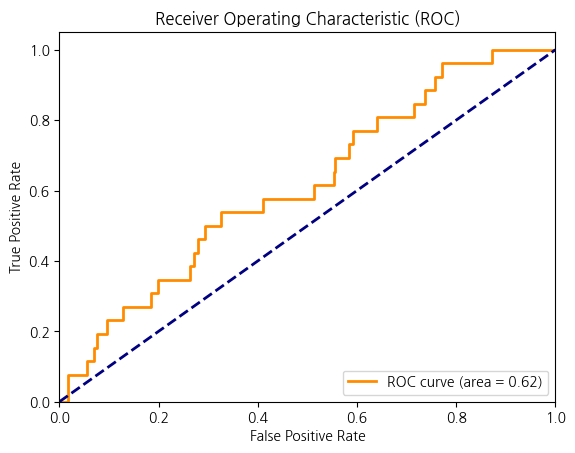

[[18654   371]
 [   24     2]]


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import numpy as np

X = data_with_lags.drop(columns=['Ïû•Ïï†Ïó¨Î∂Ä'])
y = data_with_lags['Ïû•Ïï†Ïó¨Î∂Ä']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

best_threshold = 0
best_f1_score = 0
y_proba = model.predict_proba(X_test)[:, 1]

for threshold in tqdm(np.arange(0.2, 0.001, -0.001)):
    y_pred = y_proba > threshold
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold:.3f}')
print(f'Best F1 Score: {best_f1_score:.4f}')

y_pred = y_proba > best_threshold

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(confusion_matrix(y_test, y_pred))


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 199/199 [00:00<00:00, 223.02it/s]


Best Threshold: 0.000
Best F1 Score: 0.0000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     19025
           1       0.00      1.00      0.00        26

    accuracy                           0.00     19051
   macro avg       0.00      0.50      0.00     19051
weighted avg       0.00      0.00      0.00     19051



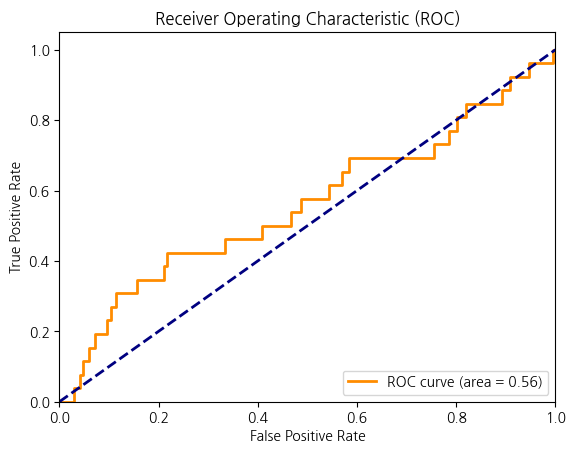

[[    0 19025]
 [    0    26]]


In [145]:
from sklearn.svm import SVC

X = data_with_lags.drop(columns=['Ïû•Ïï†Ïó¨Î∂Ä'])
y = data_with_lags['Ïû•Ïï†Ïó¨Î∂Ä']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

model = SVC(probability=True)
model.fit(X_train, y_train)

best_threshold = 0
best_f1_score = 0
y_proba = model.predict_proba(X_test)[:, 1]

for threshold in tqdm(np.arange(0.2, 0.001, -0.001)):
    y_pred = y_proba > threshold
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold:.3f}')
print(f'Best F1 Score: {best_f1_score:.4f}')

y_pred = y_proba > best_threshold

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(confusion_matrix(y_test, y_pred))


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 199/199 [00:00<00:00, 201.06it/s]


Best Threshold: 0.070
Best F1 Score: 0.0339
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19025
           1       0.03      0.04      0.03        26

    accuracy                           1.00     19051
   macro avg       0.51      0.52      0.52     19051
weighted avg       1.00      1.00      1.00     19051



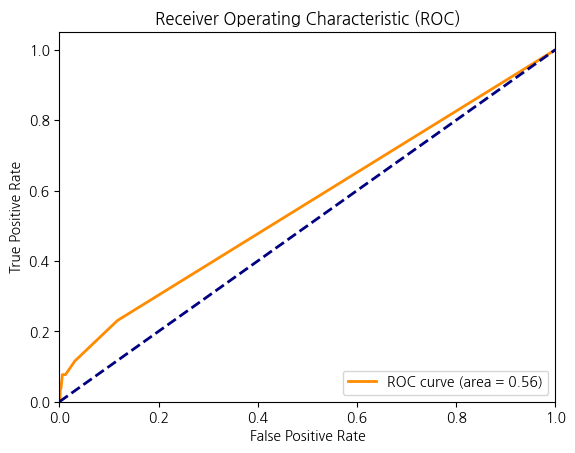

[[18993    32]
 [   25     1]]


In [146]:
from sklearn.ensemble import RandomForestClassifier

X = data_with_lags.drop(columns=['Ïû•Ïï†Ïó¨Î∂Ä'])
y = data_with_lags['Ïû•Ïï†Ïó¨Î∂Ä']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

best_threshold = 0
best_f1_score = 0
y_proba = model.predict_proba(X_test)[:, 1]

for threshold in tqdm(np.arange(0.2, 0.001, -0.001)):
    y_pred = y_proba > threshold
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold:.3f}')
print(f'Best F1 Score: {best_f1_score:.4f}')

y_pred = y_proba > best_threshold

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(confusion_matrix(y_test, y_pred))


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 199/199 [00:00<00:00, 212.12it/s]


Best Threshold: 0.033
Best F1 Score: 0.0833
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19025
           1       0.09      0.08      0.08        26

    accuracy                           1.00     19051
   macro avg       0.54      0.54      0.54     19051
weighted avg       1.00      1.00      1.00     19051



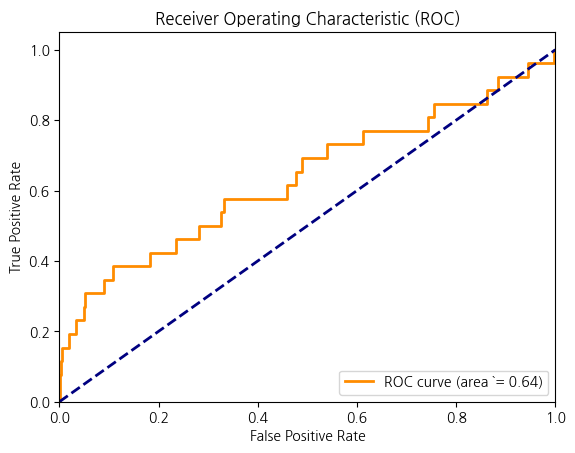

[[19005    20]
 [   24     2]]


In [147]:
from catboost import CatBoostClassifier

X = data_with_lags.drop(columns=['Ïû•Ïï†Ïó¨Î∂Ä'])
y = data_with_lags['Ïû•Ïï†Ïó¨Î∂Ä']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

model = CatBoostClassifier(learning_rate=0.1, n_estimators=1000, verbose=False)
model.fit(X_train, y_train)

best_threshold = 0
best_f1_score = 0
y_proba = model.predict_proba(X_test)[:, 1]

for threshold in tqdm(np.arange(0.2, 0.001, -0.001)):
    y_pred = y_proba > threshold
    f1 = f1_score(y_test, y_pred)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold:.3f}')
print(f'Best F1 Score: {best_f1_score:.4f}')

y_pred = y_proba > best_threshold

print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area `= {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(confusion_matrix(y_test, y_pred))


### feature_importance ###

- ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥ Í∏∞Î∞ò ÏïôÏÉÅÎ∏î Î™®Îç∏ÏóêÏÑúÎßå ÏßÄÏõêÌïòÎäî Í∞í
- XGBoostÏùò Í≤ΩÏö∞ weight, gain, cover 3Í∞ÄÏßÄÎ°ú ÏßÄÏõê
    - weight : Ìï¥Îãπ featureÍ∞Ä ÎÖ∏Îìú Î∂ÑÍ∏∞Ïóê ÏÇ¨Ïö©Îêú ÌöüÏàò
    - gain : ÎÖ∏ÎìúÍ∞Ä ÌäπÏ†ï featureÎ°ú Î∂ÑÍ∏∞ÎêòÏóàÏùÑ ÎåÄ ÏñªÎäî ÏÑ±Îä• ÏÉÅ Ïù¥Îìù (Í∏∞Î≥∏ Í∞í)
    - cover : Ìï¥Îãπ featureÏôÄ Í¥ÄÎ†®Îêú ÏÉòÌîåÏùò ÏÉÅÎåÄÏ†Å Í∞úÏàò

### shap_value ###

- Í≤åÏûÑÏù¥Î°†Ïóê Í∏∞Î∞òÌïòÏó¨ Í∞Å Î≥ÄÏàòÏùò ÏòàÏ∏°Ïóê ÎåÄÌïú Í∏∞Ïó¨ÎèÑÎ•º Í≥µÏ†ïÌïòÍ≤å Î∂ÑÎ∞∞ÌïòÎäî Î∞©Î≤ï

       Feature  Importance
5            Ïùº   11.701329
6            Ïãú   10.045523
4     cum_rate    7.284493
8           ÏöîÏùº    6.674687
1        ÏÉÅÌñ•SNR    4.670997
7            Î∂Ñ    4.384762
21   ÌïòÌñ•ÌååÏõå_lag3    3.818994
10  ÏÉÅÌñ•ÌååÏõå2_lag2    3.186886
22   ÌïòÌñ•ÌååÏõå_lag4    3.134854
0        ÏÉÅÌñ•ÌååÏõå2    3.049794
18  ÏÉÅÌñ•SNR_lag5    2.605719
11  ÏÉÅÌñ•ÌååÏõå2_lag3    2.593636
17  ÏÉÅÌñ•SNR_lag4    2.508852
24  ÌïòÌñ•SNR_lag1    2.482029
16  ÏÉÅÌñ•SNR_lag3    2.478635
14  ÏÉÅÌñ•SNR_lag1    2.469691
9   ÏÉÅÌñ•ÌååÏõå2_lag1    2.305967
2         ÌïòÌñ•ÌååÏõå    2.292200
15  ÏÉÅÌñ•SNR_lag2    2.231194
13  ÏÉÅÌñ•ÌååÏõå2_lag5    2.217715
3        ÌïòÌñ•SNR    2.209405
25  ÌïòÌñ•SNR_lag2    2.164612
28  ÌïòÌñ•SNR_lag5    2.127226
20   ÌïòÌñ•ÌååÏõå_lag2    2.110494
12  ÏÉÅÌñ•ÌååÏõå2_lag4    2.101882
23   ÌïòÌñ•ÌååÏõå_lag5    2.093243
26  ÌïòÌñ•SNR_lag3    1.793118
19   ÌïòÌñ•ÌååÏõå_lag1    1.747324
27  ÌïòÌñ•SNR_lag4    1.514738


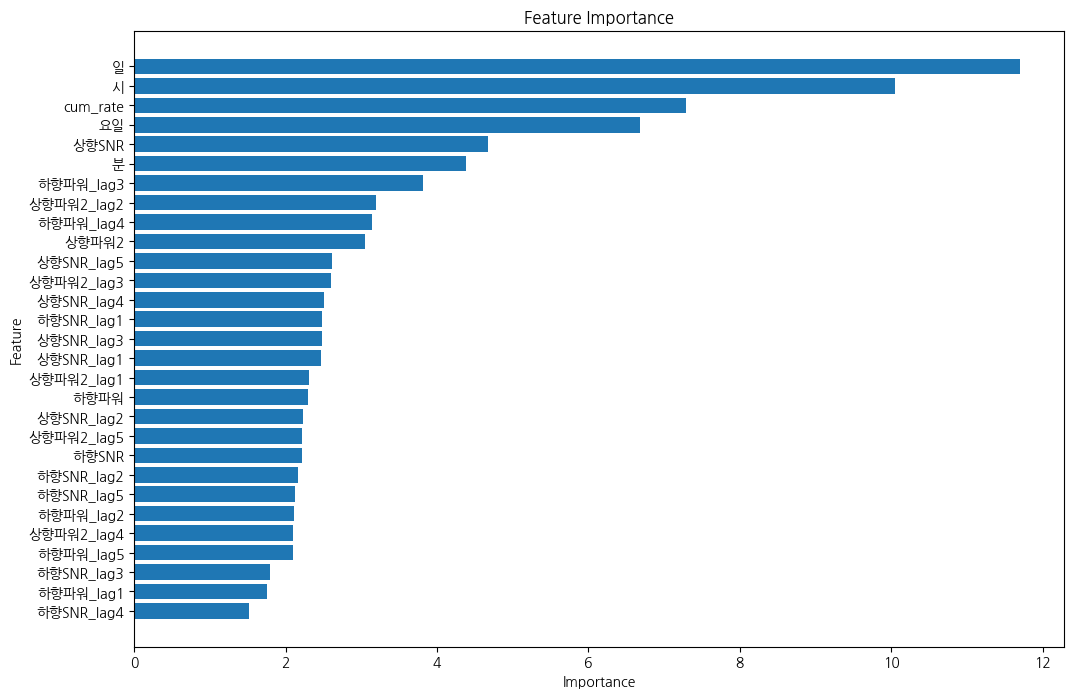

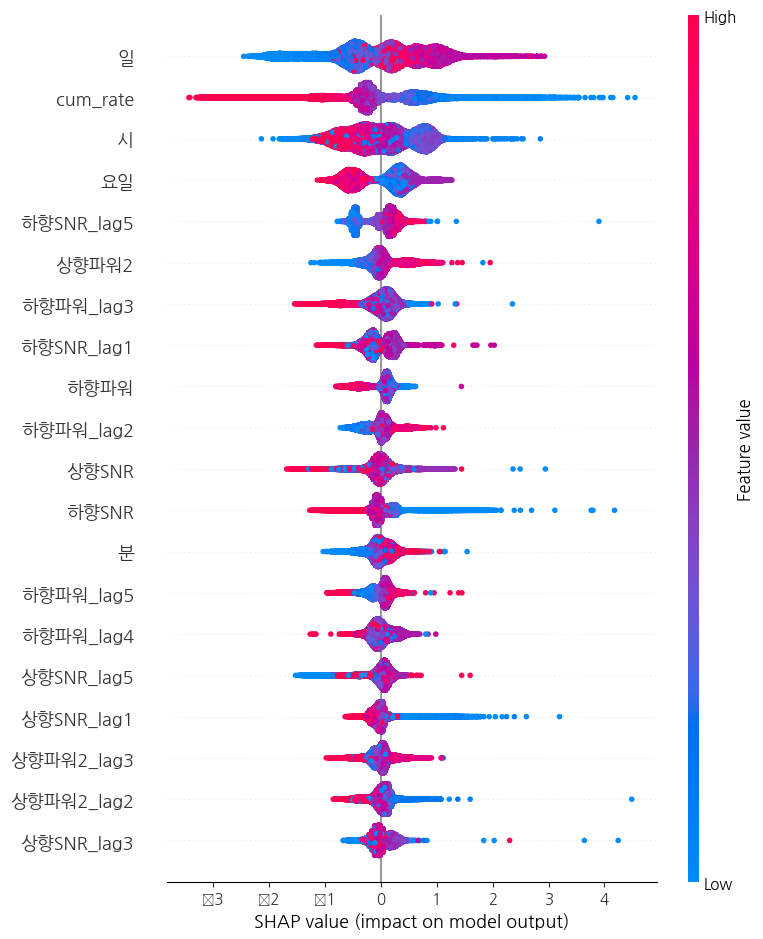

In [148]:
import shap

# Î™®Îç∏ feature_importance Í∞í Ï†ÄÏû•
feature_importances = model.feature_importances_

# Ïó¥ ÎßàÎã§ feature_importance Í∞í dfÌôî
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# ÎÜíÏùÄÏàú Ï†ïÎ†¨
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 8))
plt.rc('font', family='NanumGothic')
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# shap_value Í∞í Ï∂îÏ∂ú
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Í∑∏ÎûòÌîÑ
shap.summary_plot(shap_values, X)

### Out Of Fold Î•º ÌÜµÌïú Î™®Îç∏ ÌïôÏäµ ###
- ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏùºÎ∞òÌôî ÏÑ±Îä•ÏùÑ Ï†ïÌôïÌïòÍ≤å ÌååÏïÖ
- Îã§ÏñëÌïú Î™®Îç∏Ïùò Ïû•Ï†êÏùÑ Í≤∞Ìï©ÌïòÏó¨ ÏïôÏÉÅÎ∏î ÌïôÏäµÏùò ÏµúÏ†ï ÏòàÏ∏° ÏÑ±Îä• Ìñ•ÏÉÅ

  0%|          | 0/10 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 199/199 [00:02<00:00, 66.62it/s]


Best Threshold: 0.018
Best F1 Score: 0.0632
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     95123
           1       0.04      0.16      0.06       130

    accuracy                           0.99     95253
   macro avg       0.52      0.58      0.53     95253
weighted avg       1.00      0.99      1.00     95253



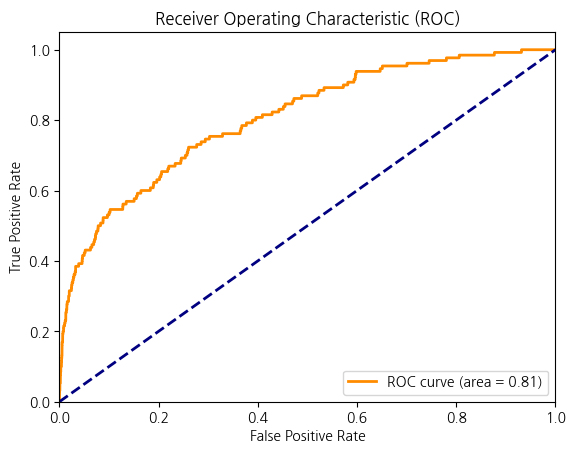

[[94609   514]
 [  109    21]]


In [153]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tqdm.auto import tqdm
from catboost import CatBoostClassifier

X = data_with_lags.drop(columns=['Ïû•Ïï†Ïó¨Î∂Ä'])
y = data_with_lags['Ïû•Ïï†Ïó¨Î∂Ä']

# Îç∞Ïù¥ÌÑ∞Î•º 10Í∞úÏùò Í≥ÑÏ∏µÏúºÎ°ú ÎÇòÎàî Ïù¥ Îïå StratifiedKFoldÎ•º ÌÜµÌï¥ Ïû•Ïï†, ÎπÑÏû•Ïï† ÎπÑÏú®Ïù¥ Ïú†ÏßÄÎêòÎèÑÎ°ù ÏÑ§Ï†ï
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=30)

# oofÎ•º ÏÇ¨Ïö©Ìïú ÏòàÏ∏°Í∞íÏùÑ Ï†ÄÏû•Ìï† Î≥ÄÏàò ÏÑ§Ï†ï
oof_preds = np.zeros(X.shape[0])

# train, valid ÏÖãÏùÑ oofÎ°ú ÎÇòÎàÑÏñ¥ÏÑú Î∂ÑÏÑù
for train_idx, valid_idx in tqdm(skf.split(X, y), total=n_splits):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    # Î™®Îç∏ ÌïôÏäµ
    model = XGBClassifier(learning_rate=0.1, n_estimators=1000)
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False, early_stopping_rounds=50)
    
    # Î™®Îç∏ÏùÑ ÌÜµÌï¥ ÏòàÏ∏°Ìïú valid Í∞íÏùÑ off_predsÏóê Ï†ÄÏû•
    oof_preds[valid_idx] = model.predict_proba(X_valid)[:, 1]

# Ïù¥Ï†ÑÍ≥º ÎèôÏùºÌïòÍ≤å ÏµúÏ†ÅÏùò ÏûÑÍ≥ÑÍ∞í Ï∞æÏùå
best_threshold = 0
best_f1_score = 0

for threshold in tqdm(np.arange(0.2, 0.001, -0.001)):
    oof_predict = oof_preds > threshold
    f1 = f1_score(y, oof_predict)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold:.3f}')
print(f'Best F1 Score: {best_f1_score:.4f}')

# ÏûÑÍ≥ÑÍ∞í Í∏∞Ï§Ä True, False Ï†ÄÏû•
oof_predict = oof_preds > best_threshold

# Ïã§Ï†ú Í∞íÍ≥º ÏòàÏ∏°Í∞í ÎπÑÍµê
print(classification_report(y, oof_predict))

# ROC Í∑∏ÎûòÌîÑ
fpr, tpr, _ = roc_curve(y, oof_preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(confusion_matrix(y, oof_predict))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 199/199 [00:04<00:00, 46.32it/s]


Best Threshold: 0.200
Best F1 Score: 0.0027
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     95123
           1       0.00      1.00      0.00       130

    accuracy                           0.00     95253
   macro avg       0.00      0.50      0.00     95253
weighted avg       0.00      0.00      0.00     95253



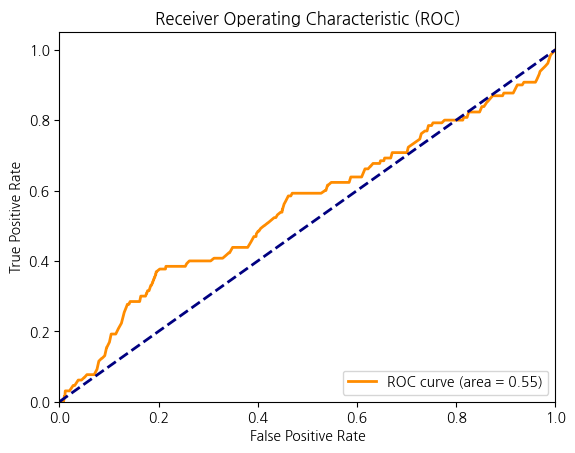

[[    0 95123]
 [    0   130]]


In [150]:
# catboost !!!!!!!!!!!!!

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from catboost import CatBoostClassifier
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = data_with_lags.drop(columns=['Ïû•Ïï†Ïó¨Î∂Ä'])
y = data_with_lags['Ïû•Ïï†Ïó¨Î∂Ä']

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=15)

oof_preds = np.zeros(X.shape[0])

# ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌïú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
for train_idx, valid_idx in tqdm(skf.split(X, y), total=n_splits):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    model = CatBoostClassifier(learning_rate=0.1, iterations=1000, eval_metric='F1', verbose=0, early_stopping_rounds=50)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid))
    
    oof_preds[valid_idx] = model.predict_proba(X_valid)[:, 1]

# ÏµúÏ†ÅÏùò ÏûÑÍ≥ÑÍ∞í Ï∞æÍ∏∞
best_threshold = 0
best_f1_score = 0

for threshold in tqdm(np.arange(0.2, 0.001, -0.001)):
    oof_predict = oof_preds > threshold
    f1 = f1_score(y, oof_predict)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold:.3f}')
print(f'Best F1 Score: {best_f1_score:.4f}')

# ÏµúÏ†ÅÏùò ÏûÑÍ≥ÑÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°
oof_predict = oof_preds > best_threshold
print(classification_report(y, oof_predict))

# ROC Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞
fpr, tpr, _ = roc_curve(y, oof_preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†•
print(confusion_matrix(y, oof_predict))

  0%|          | 0/10 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 199/199 [00:03<00:00, 62.82it/s]


Best Threshold: 0.002
Best F1 Score: 0.0055
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     95123
           1       0.00      0.18      0.01       130

    accuracy                           0.91     95253
   macro avg       0.50      0.55      0.48     95253
weighted avg       1.00      0.91      0.95     95253



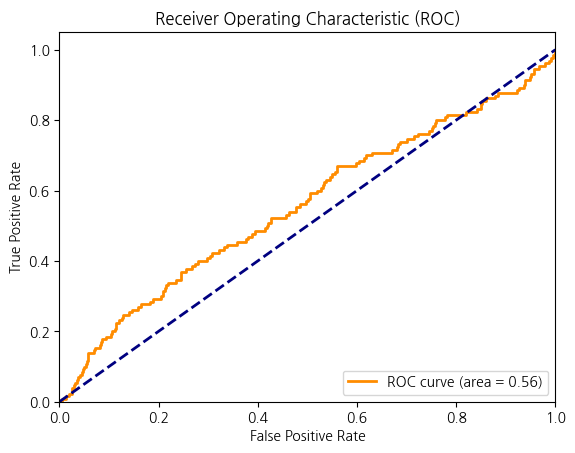

[[86976  8147]
 [  107    23]]


In [151]:
# SVC!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.svm import SVC

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
X = data_with_lags.drop(columns=['Ïû•Ïï†Ïó¨Î∂Ä'])
y = data_with_lags['Ïû•Ïï†Ïó¨Î∂Ä']

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=15)

oof_preds = np.zeros(X.shape[0])

# ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌïú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
for train_idx, valid_idx in tqdm(skf.split(X, y), total=n_splits):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
    
    model = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=15)
    model.fit(X_train, y_train)
    
    oof_preds[valid_idx] = model.predict_proba(X_valid)[:, 1]

# ÏµúÏ†ÅÏùò ÏûÑÍ≥ÑÍ∞í Ï∞æÍ∏∞
best_threshold = 0
best_f1_score = 0

for threshold in tqdm(np.arange(0.2, 0.001, -0.001)):
    oof_predict = oof_preds > threshold
    f1 = f1_score(y, oof_predict)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

print(f'Best Threshold: {best_threshold:.3f}')
print(f'Best F1 Score: {best_f1_score:.4f}')

# ÏµúÏ†ÅÏùò ÏûÑÍ≥ÑÍ∞íÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°
oof_predict = oof_preds > best_threshold
print(classification_report(y, oof_predict))

# ROC Í≥°ÏÑ† Í∑∏Î¶¨Í∏∞
fpr, tpr, _ = roc_curve(y, oof_preds)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# ÌòºÎèô ÌñâÎ†¨ Ï∂úÎ†•
print(confusion_matrix(y, oof_predict))

       Feature  Importance
6            Ïãú    0.053027
5            Ïùº    0.051961
12  ÏÉÅÌñ•ÌååÏõå2_lag4    0.043833
27  ÌïòÌñ•SNR_lag4    0.040302
2         ÌïòÌñ•ÌååÏõå    0.039229
26  ÌïòÌñ•SNR_lag3    0.038947
0        ÏÉÅÌñ•ÌååÏõå2    0.038490
1        ÏÉÅÌñ•SNR    0.037352
8           ÏöîÏùº    0.037264
7            Î∂Ñ    0.037221
28  ÌïòÌñ•SNR_lag5    0.036937
24  ÌïòÌñ•SNR_lag1    0.036066
4     cum_rate    0.035614
20   ÌïòÌñ•ÌååÏõå_lag2    0.035171
11  ÏÉÅÌñ•ÌååÏõå2_lag3    0.034814
18  ÏÉÅÌñ•SNR_lag5    0.033650
3        ÌïòÌñ•SNR    0.033493
19   ÌïòÌñ•ÌååÏõå_lag1    0.032414
10  ÏÉÅÌñ•ÌååÏõå2_lag2    0.032193
21   ÌïòÌñ•ÌååÏõå_lag3    0.030411
9   ÏÉÅÌñ•ÌååÏõå2_lag1    0.029413
25  ÌïòÌñ•SNR_lag2    0.028581
17  ÏÉÅÌñ•SNR_lag4    0.028090
22   ÌïòÌñ•ÌååÏõå_lag4    0.027688
13  ÏÉÅÌñ•ÌååÏõå2_lag5    0.026689
14  ÏÉÅÌñ•SNR_lag1    0.025908
23   ÌïòÌñ•ÌååÏõå_lag5    0.025548
15  ÏÉÅÌñ•SNR_lag2    0.025191
16  ÏÉÅÌñ•SNR_lag3    0.024504


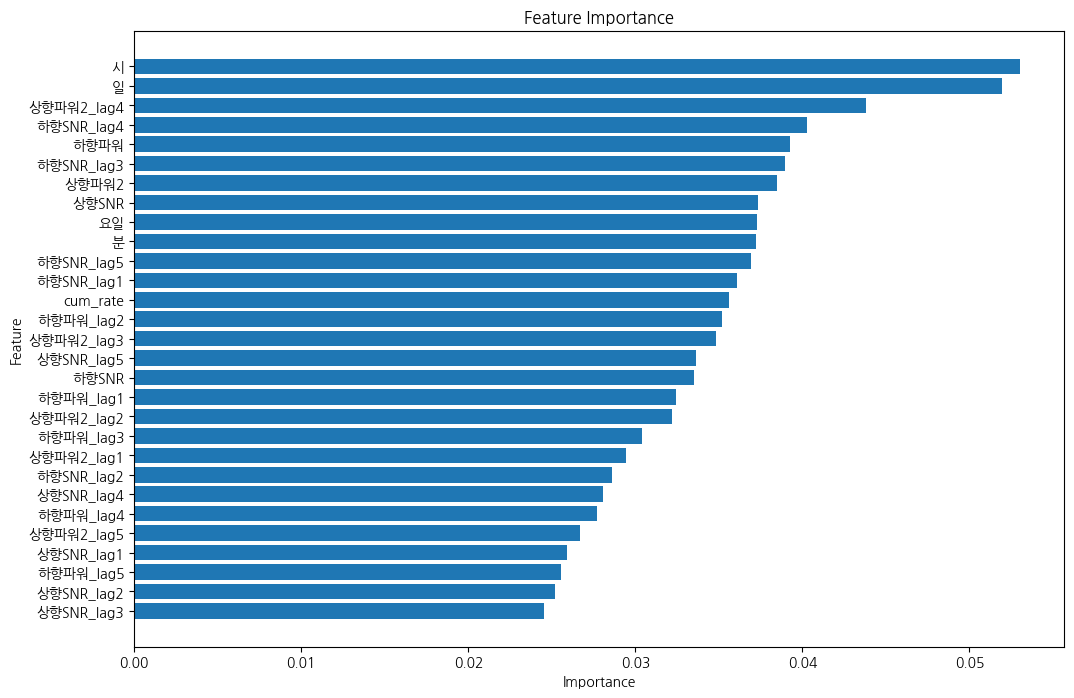

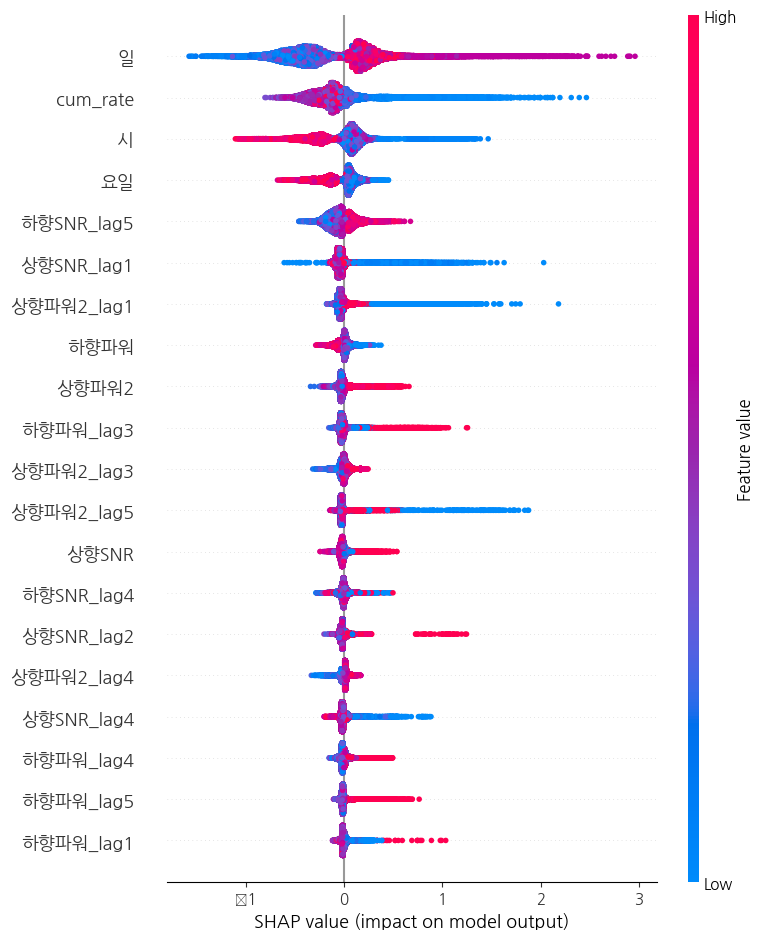

In [154]:
import shap

feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

In [155]:
# Í≥†Ïû•ÌôïÎ•†Í≥º Ïã§Ï†ú Ïû•Ïï†Ïó¨Î∂Ä Ïó¥ÏùÑ Ï∂îÍ∞ÄÌïòÏó¨ ÎπÑÍµê

X['Í≥†Ïû•ÌôïÎ•†'] = oof_preds
X['Ïã§Ï†úÏû•Ïï†Ïó¨Î∂Ä'] = y
X.sort_values('Í≥†Ïû•ÌôïÎ•†', ascending=False)[:50]

ÏÉÅÌñ•ÌååÏõå2      ÏÉÅÌñ•SNR       ÌïòÌñ•ÌååÏõå      ÌïòÌñ•SNR  cum_rate   Ïùº   Ïãú   Î∂Ñ  ÏöîÏùº  \
58312  45.000000  31.000000  -2.000000  38.000000  0.000000  18   1  25   3   
58119  43.000000  36.000000  -4.000000  34.000000  0.057221  18   0  15   3   
58407  43.000000  36.000000   3.000000  40.000000  0.062069  18   2   5   3   
58544  30.000000  36.000000  16.000000  37.000000  0.036036  18   2  55   3   
58425  37.500000  28.750000   5.500000  43.000000  0.079268  18   2   5   3   
58501  42.800000  35.600000  -5.800000  30.800000  0.309748  18   2  35   3   
58476  37.833333  28.666667  -0.333333  40.333333  0.048780  18   2  25   3   
58506  48.000000  36.000000   2.000000  36.000000  0.010274  18   2  35   3   
58499  28.000000  36.000000   0.000000  26.000000  0.014706  18   2  35   3   
58531  28.000000  36.000000  11.000000  39.000000  0.014493  18   2  55   3   
58548  46.333333  29.000000   0.000000  39.000000  0.084848  18   2  55   3   
58515  27.000000  33.000000   0.000000  27.000000  0.014599  18   2  45   3   
92411  37.000000  33.000000  -1.000000  39.000000  0.082305  30  20  30   1   
58403  49.500000  33.333333   3.000000  40.333333  0.301587  18   2   5   3   
58409  51.000000  28.000000   3.000000  38.000000  0.222222  18   2   5   3   
58457  38.000000  34.000000  -4.000000  34.000000  0.000000  18   2  25   3   
58145  46.000000  34.000000   1.000000  38.000000  0.101124  18   0  25   3   
58296  35.000000  33.000000   1.000000  38.000000  0.096591  18   1  15   3   
58603  52.500000  25.500000   0.000000  39.000000  0.102564  18   3  25   3   
58439  44.833333  35.666667   0.500000  40.333333  0.037037  18   2  15   3   
58473  28.000000  36.000000  11.000000  40.000000  0.014815  18   2  25   3   
56160  30.000000  36.000000  15.000000  37.000000  0.028302  17  11  35   2   
58642  38.000000  13.000000  -3.000000  34.000000  0.000000  18   3  35   3   
58157  43.000000  36.000000  -1.000000  35.000000  0.057065  18   0  25   3   
58276  51.000000  36.000000   3.000000  35.000000  0.010327  18   1   5   3   
58609  38.000000  36.000000  -3.000000  35.000000  0.000000  18   3  25   3   
58232  51.000000  30.000000   3.000000  35.000000  0.010345  18   0  55   3   
87458  48.000000  30.000000  -8.000000  27.000000  0.000000  28  23   0   6   
58512  44.500000  36.000000   1.000000  38.500000  0.247312  18   2  45   3   
58538  53.000000  36.000000  -1.000000  39.000000  0.094828  18   2  55   3   
58526  33.000000  34.000000   0.000000  39.000000  0.313433  18   2  45   3   
58527  30.571429  26.714286   7.285714  38.714286  0.036364  18   2  45   3   
58553  44.333333  36.666667  -3.666667  34.333333  0.059621  18   3   5   3   
58680  35.000000  34.000000  -5.000000  33.000000  0.000000  18   3  55   3   
58465  34.500000  34.000000   6.500000  38.500000  0.072727  18   2  25   3   
72637  55.000000  32.000000   4.000000  39.000000  0.160622  23   9   0   1   
75233  53.000000  29.000000   3.000000  39.000000  0.152381  24   8   0   2   
90914  31.000000  39.000000   2.000000  42.000000  0.000000  30   2  35   1   
58516  53.000000  31.000000  -1.000000  39.000000  0.095652  18   2  45   3   
55912  49.000000  37.000000   0.000000  38.000000  0.063725  17  10   5   2   
58569  48.000000  36.000000   2.000000  36.000000  0.010256  18   3   5   3   
43206  51.000000  36.000000  -4.000000  34.000000  0.056140  13  12  55   5   
58450  46.000000  36.000000  -4.000000  38.000000  0.307571  18   2  15   3   
87250  49.000000  33.000000   0.000000  35.000000  0.000000  28  21  30   6   
58556  31.000000  25.666667   6.000000  39.666667  0.044643  18   3   5   3   
73918  55.000000  32.000000   3.000000  39.000000  0.160804  23  19   0   1   
74765  47.000000  34.000000   6.000000  41.000000  0.010526  24   3   0   2   
84003  50.000000  30.000000   7.000000  35.000000  0.000000  27  17  25   5   
58514  41.000000  36.000000  -1.000000  36.500000  0.381783  18   2  45   3   
58634  46.000000  29.000000